### Determine the optimal K number

* This notebook determines the optimal number of K based on K-means algorithm using Elbow method
* 514 features were selected out of the 1063 features. Then use LASSO and PCA to contidue reduce dimension to 44 variables (all of them turned out to be numerical variables). Impute NA with means.

Reference: : https://github.com/sarguido/k-means-clustering/blob/master/k-means-clustering.ipynb

In [2]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from scipy.spatial.distance import cdist, pdist
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm
from sklearn.decomposition import PCA
from sklearn_extensions.fuzzy_kmeans import KMedians, FuzzyKMeans, KMeans
%matplotlib inline

#### Approach IV 514 features were selected out of the 1063 features. Then use LASSO and PCA to contidue reduce dimension to 44 variables (all of them turned out to be numerical variables). Impute NA with means.

In [3]:
df = pd.read_csv('/mnt/UW/outputDataset/pca_reduced_LASSO.csv')

In [13]:
import random
random.seed(123)
df_sample = df.sample(frac=0.0125, replace=False)

In [15]:
df_sample = df_sample.fillna(df_sample.mean())
X = StandardScaler().fit_transform(df_sample)

In [17]:
fuzzy = FuzzyKMeans(k=7, m=2).fit(X)

In [23]:
a = np.min(cdist(X, fuzzy.cluster_centers_, 'euclidean'),axis=1)

In [24]:
a = sum(a**2)

In [26]:
a

2602776.944664867

In [27]:
b = sum(pdist(X)**2)/X.shape[0]

In [28]:
b

2602996.0000016894

In [32]:
(b-a)/b*100

0.008415508007778261

00:03:39.65


Text(0.5,1,'Variance Explained vs. k')

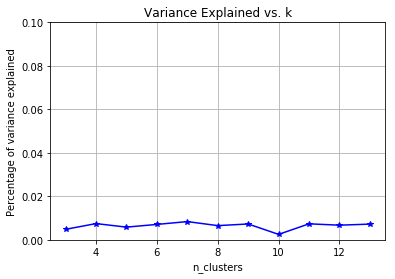

In [33]:
import time
start = time.time()
# Determine your k range
k_range = range(3,14)

# Fit the kmeans model for each n_clusters = k

fuzzy_k_means_var = [FuzzyKMeans(k=k, m=2).fit(X) for k in k_range]

# Pull out the cluster centers for each model
centroids = [X.cluster_centers_ for X in fuzzy_k_means_var]

# Calculate the Euclidean distance from 
# each point to each cluster center
k_euclid = [cdist(X, cent, 'euclidean') for cent in centroids]
dist = [np.min(ke,axis=1) for ke in k_euclid]

# Total within-cluster sum of squares
wcss = [sum(d**2) for d in dist]

# The total sum of squares
tss = sum(pdist(X)**2)/X.shape[0]

# The between-cluster sum of squares
bss = tss - wcss

end = time.time()

hours, rem = divmod(end-start, 3600)
minutes, seconds = divmod(rem, 60)
print("{:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds))

# elbow curve
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(k_range, bss/tss*100, 'b*-')
ax.set_ylim((0,0.1))
plt.grid(True)
plt.xlabel('n_clusters')
plt.ylabel('Percentage of variance explained')
plt.title('Variance Explained vs. k')